In [1]:
import numpy as np
from EMRM1D import EMRM_simulator
import matplotlib.pyplot as plt


# 1). Create simulator object

In [2]:
testModel = EMRM_simulator()

# 2). Set the layered model parameters

In [3]:
# Layer thicknesses
thicknesses = np.array([1.5,1.5,1.5,1.5,1.5,1.5,10])

# dielectric constant values
eps = np.array([3.15,4.3,3.15,4.3,3.15,4.3,3.15,8.15])

# Loss tangent or conductivity values
lossOrCond = np.array([0.002, 0.02, 0.002, 0.02, 0.002, 0.02,0.002,0.002])

# 1 if using conductivity, 0 if using loss tangent
useConductivity = 0

# Spacecraft altitude in meters
H = 300*1000


testModel.setModel(H,thicknesses,eps,lossOrCond,useConductivity)

# 3). Set the radar pulse

In [4]:
# Load pulse from csv file. 
#timeTest, pulseTest = testModel.loadPulse('Sharad_Ideal_sourcePulse.csv')
timeTest, pulseTest = testModel.loadPulse('RIMFAX_Pulse_ideal_sourcePulse.csv')

# Set pulse
testModel.setPulse(pulseTest,timeTest)

# 4). Set the radar matched filter

In [5]:
#tmfTest,fmfTest,mfTest = testModel.loadMatchFilter('Sharad_Ideal_matchedFilter.csv')
tmfTest,fmfTest,mfTest = testModel.loadMatchFilter('RIMFAX_Pulse_ideal_matchedFilter.csv')


testModel.setMatchFilter(mfTest,fmfTest,tmfTest)

# 5). Set the windowing parameters

In [6]:
testModel.setWindowParam(6,150*10**6,300*10**6)

# 6). Run simulation and plot result

/anaconda2/lib/python2.7/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


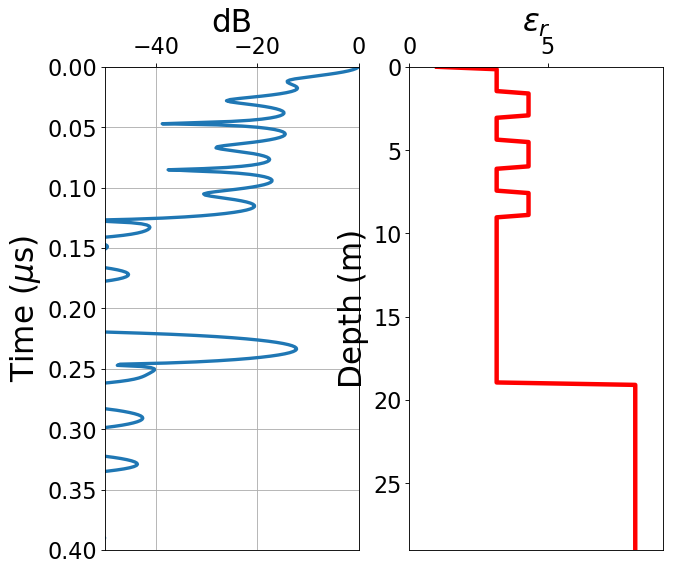

array([[-5.00000000e-04+0.00000000e+00j, -1.10546480e+02-1.37800507e+01j,
        -4.83459851e-13-2.83483557e-11j],
       [-4.99999048e-04+0.00000000e+00j, -1.10514180e+02-2.03537658e+00j,
         2.76713177e-11-6.64545823e-12j],
       [-4.99998095e-04+0.00000000e+00j, -1.10493843e+02+9.68582952e+00j,
         1.25877218e-11+2.55971549e-11j],
       ...,
       [ 4.99998095e-04+0.00000000e+00j, -1.10648127e+02+5.53151105e+00j,
         2.25522856e-11+1.66331393e-11j],
       [ 4.99999048e-04+0.00000000e+00j, -1.10620571e+02+1.72778656e+01j,
        -1.13865244e-11+2.57023820e-11j],
       [ 5.00000000e-04+0.00000000e+00j, -1.10584401e+02-2.55382662e+01j,
        -2.76661028e-11-5.60903606e-12j]])

In [7]:
testModel.plotResult=True
testModel.plotTime=0.4
plt.rcParams.update({'font.size': 20})
testModel.runSim()